import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open('locked outof heven_1.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-2)
print(signal)
signal = np.fromstring(signal, 'Int16')


#If Stereo
if spf.getnchannels() == 2:
    print('Just mono files')
    sys.exit(0)

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)
plt.show()

audio_data= 'Locked Out Of Heaven.m4a'

In [5]:
import soundfile as sf
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import random


from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

C:/Users/jan/Music/test\a\All Falls Down.wav
[[0.00601196 0.00601196]
 [0.00604248 0.00604248]
 [0.00445557 0.00448608]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


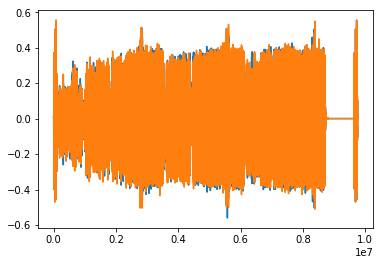

C:/Users/jan/Music/test\a\H.O.L.Y.wav
[[0.00601196 0.00601196]
 [0.00604248 0.00604248]
 [0.00445557 0.00448608]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


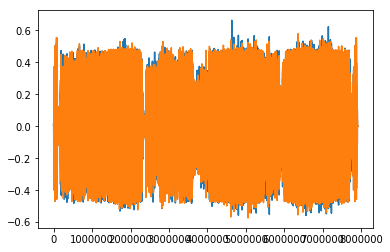

C:/Users/jan/Music/test\a\No Roots.wav
[[0.00601196 0.00601196]
 [0.00604248 0.00604248]
 [0.00445557 0.00448608]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


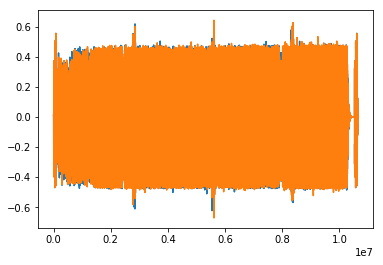

C:/Users/jan/Music/test\a\Sooner Or Later.wav
[[0.00601196 0.00601196]
 [0.00604248 0.00604248]
 [0.00445557 0.00448608]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


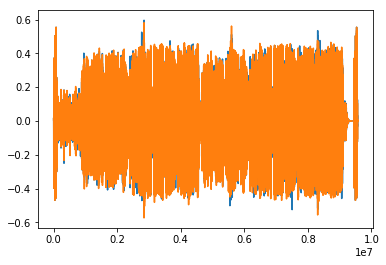

In [6]:
root = "./music_folder"
path = os.path.join(root)


for r,d,f in os.walk(path):
#   print(r)
    for file in f:
#        print(file)
        time.sleep(1)
        test=(os.path.join(r,file))
        print(test)
        data, samplerate = sf.read(os.path.join(test))# convert to array
        print(data)
        plt.plot(data)  # graph it
        plt.show()
            
        #print(test)

In [7]:
DATADIR = "C:/Users/jan/Music/test/a"
training_data=[]
Data_resize=7900000

def create_training_data():
    for r,d,f in os.walk(DATADIR): 
        for file in f:
            path = os.path.join(r,file)                     #create the path for one file & print it
            print(path,'path \n',r,'r \n',d,'d \n',f,'f \n')
            
            
            data, samplerate = sf.read(path) #extract data from audio file (array)
            print(data.shape) #print unreshape data
            
            re_size_data = np.resize(data, (Data_resize, 2)) #reshape data
            print(re_size_data.shape) #print shape data
            
            training_data.append([re_size_data, file])
            
            #plt.plot(re_size_data)  # graph it
#plt.show()
            
create_training_data()
for sample in training_data:
    print('\n\n',sample[1])

C:/Users/jan/Music/test/a\All Falls Down.wav path 
 C:/Users/jan/Music/test/a r 
 [] d 
 ['All Falls Down.wav', 'H.O.L.Y.wav', 'No Roots.wav', 'Sooner Or Later.wav'] f 

(9770102, 2)
(7900000, 2)
C:/Users/jan/Music/test/a\H.O.L.Y.wav path 
 C:/Users/jan/Music/test/a r 
 [] d 
 ['All Falls Down.wav', 'H.O.L.Y.wav', 'No Roots.wav', 'Sooner Or Later.wav'] f 

(7921782, 2)
(7900000, 2)
C:/Users/jan/Music/test/a\No Roots.wav path 
 C:/Users/jan/Music/test/a r 
 [] d 
 ['All Falls Down.wav', 'H.O.L.Y.wav', 'No Roots.wav', 'Sooner Or Later.wav'] f 

(10654838, 2)
(7900000, 2)
C:/Users/jan/Music/test/a\Sooner Or Later.wav path 
 C:/Users/jan/Music/test/a r 
 [] d 
 ['All Falls Down.wav', 'H.O.L.Y.wav', 'No Roots.wav', 'Sooner Or Later.wav'] f 

(9581686, 2)
(7900000, 2)


 All Falls Down.wav


 H.O.L.Y.wav


 No Roots.wav


 Sooner Or Later.wav


In [19]:
random.shuffle(training_data)
for sample in training_data:
    print('\n\n',sample[1])
    print(sample[0])



 No Roots.wav
[[ 0.00601196  0.00601196]
 [ 0.00604248  0.00604248]
 [ 0.00445557  0.00448608]
 ...
 [-0.07839966 -0.0015564 ]
 [-0.07693481 -0.00195312]
 [-0.07141113  0.00482178]]


 H.O.L.Y.wav
[[ 0.00601196  0.00601196]
 [ 0.00604248  0.00604248]
 [ 0.00445557  0.00448608]
 ...
 [-0.02258301 -0.02258301]
 [-0.02542114 -0.02542114]
 [-0.00473022 -0.00473022]]


 Sooner Or Later.wav
[[0.00601196 0.00601196]
 [0.00604248 0.00604248]
 [0.00445557 0.00448608]
 ...
 [0.14056396 0.04428101]
 [0.15939331 0.09020996]
 [0.1890564  0.14303589]]


 All Falls Down.wav
[[0.00601196 0.00601196]
 [0.00604248 0.00604248]
 [0.00445557 0.00448608]
 ...
 [0.13601685 0.25012207]
 [0.11633301 0.2409668 ]
 [0.07785034 0.23956299]]


In [26]:
X = []
y = []


for features,label in training_data:
    X.append(features)
    y.append(label)
print(len(X))

print(X[0].reshape(-1, Data_resize, 2))

X = np.array(X).reshape(-1, Data_resize, 2)
print(X.shape)

encodert = LabelEncoder()
encodert.fit(y)
encodedt_Y = encodert.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
int_Y_Test = np_utils.to_categorical(encodedt_Y)

print(int_Y_Test)



4
[[[ 0.00601196  0.00601196]
  [ 0.00604248  0.00604248]
  [ 0.00445557  0.00448608]
  ...
  [-0.07839966 -0.0015564 ]
  [-0.07693481 -0.00195312]
  [-0.07141113  0.00482178]]]
(4, 7900000, 2)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [28]:
import pickle

pickle_out = open("X_music.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_music.pickle","wb")
pickle.dump(int_Y_Test, pickle_out)
pickle_out.close()